# Average Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def addSaltnPepper(data, saltiness, spiceness):
    height,width = data.shape[:2]
    noise = np.zeros((height,width), data.dtype)
    cv2.randu(noise,0,255)        
    salt = noise > saltiness
    pepper = noise < spiceness
    
    img2 = data.copy()
    img2[salt] = 255
    img2[pepper] = 0
    return img2

#Gets all x-y neighbors 
def getNeighborhood(data, x,y, N):
    height,width = data.shape[:2]
    x_min = x - N//2
    x_min = 0 if x_min < 0 else x_min
    
    x_max = x + N//2
    x_max = height-1 if x_max +1 == height else x_max
    
    y_min = y - N//2
    y_min = 0 if y_min < 0 else y_min
    
    y_max = y + N//2
    y_max = width-1 if y_max +1 == width else y_max
    
    return data[x_min:x_max+1, y_min:y_max+1]
                
#Apply the average filter
def averageFilter(img, N):
    height,width = img.shape[:2]
    new = np.ones((height,width), dtype='uint8')
    for i in range(height):
        for j in range(width):
            new[i][j] = np.mean(getNeighborhood(img, i, j, N))
    return new


In [3]:
imgfile = '../../db/jenny.jpg'
img= cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
height,width = img.shape[:2]

In [4]:
#Adds salt'n pepper noise
noisy = addSaltnPepper(img, 250,8)

#Applies the average filter with neighborhood 3x3
filtered = averageFilter(noisy, 3)


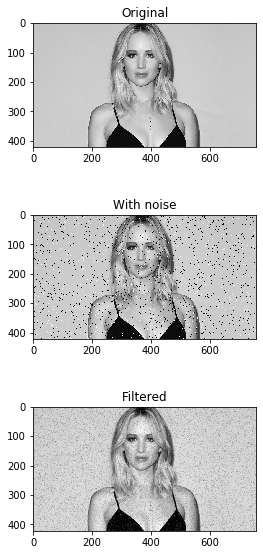

In [5]:
plt.figure(figsize=(4,10))
plt.subplot(311), plt.title('Original'), plt.imshow(img, cmap='gray')
plt.subplot(312), plt.title('With noise'), plt.imshow(noisy, cmap='gray')
plt.subplot(313), plt.title('Filtered'), plt.imshow(filtered, cmap='gray')
plt.show()